In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def first_pass(V, pix):
    data= np.zeros((pix.shape[0]+1, pix.shape[1]+1))
    count= 1
    eq_class= [i for i in range(2000)]
    for i in range(1, data.shape[0]):
        for j in range(1, data.shape[1]):
            if pix[i-1][j-1] in V:
                if data[i-1][j]== data[i][j-1] and data[i][j-1]==0:
                    data[i][j]= count
                    count+= 1
                elif data[i-1][j]== data[i][j-1]:
                        data[i][j]= data[i-1][j]
                elif data[i-1][j]!= data[i][j-1] and (data[i-1][j]!= 0 and data[i][j-1]!= 0)  :
                    eq_class[int(max(data[i-1][j], data[i][j-1]))]= int(min(data[i-1][j], data[i][j-1]))
                    data[i][j]= min(data[i-1][j], data[i][j-1])
                elif data[i-1][j]!= data[i][j-1]:
                    data[i][j]= max(data[i-1][j], data[i][j-1])


    data= np.delete(data, (0), axis= 0)
    data= np.delete(data, (0), axis= 1)
    return data, list(eq_class[: count])

def second_pass(data, eq_class):
    d= {}
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i][j]!= 0:
                val= int(data[i][j])
                while(eq_class[val]!= val):
                    val= eq_class[val]
                if val in d:
                    d[val].append(data[i][j])
                else:
                    d[val]= [data[i][j]]
                data[i][j]= val
    return data, d

def component_labelling(V, pix):
    data, eq_class= first_pass(V, pix)
    data, eq= second_pass(data, eq_class)
    for i in eq:
        eq[i]= list(set(eq[i]))
    return data, eq

# User Matrix

In [3]:
V= np.array(list(map(int, input("Enter space separated allowed pixel values: ").split())))
V

Enter space separated allowed pixel values: 1 2


array([1, 2])

In [4]:
# n, m= map(int, input("Enter size of matrix(n, m): ").split())
# print("Enter matrix values: ")
# l= []
# for i in range(n):
#     _= np.array(list(map(int, input().split())))
#     l.append(_)
#pix= np.array(l)
n, m= 8, 8
pix= np.array([[1, 1, 0, 1, 2, 1, 0, 2],
       [1, 1, 0, 1, 0, 1, 0, 1],
       [1, 2, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 2, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 1],
       [1, 2, 1, 1, 0, 0, 0, 1],
       [1, 1, 2, 1, 0, 1, 1, 1]])

In [5]:
pix

array([[1, 1, 0, 1, 2, 1, 0, 2],
       [1, 1, 0, 1, 0, 1, 0, 1],
       [1, 2, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 2, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 1],
       [1, 2, 1, 1, 0, 0, 0, 1],
       [1, 1, 2, 1, 0, 1, 1, 1]])

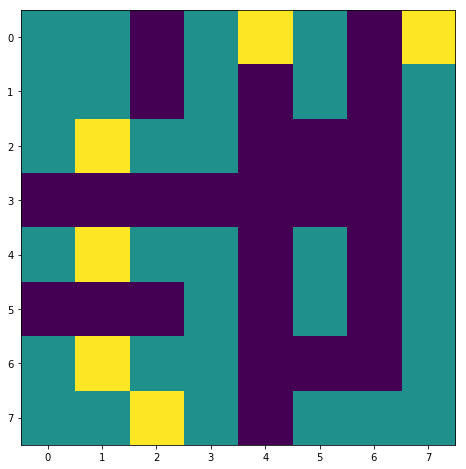

In [6]:
plt.figure(figsize= (n, m))
plt.imshow(pix)
plt.show()

In [7]:
data, eq= component_labelling(V, pix)
data, eq

(array([[1., 1., 0., 1., 1., 1., 0., 3.],
        [1., 1., 0., 1., 0., 1., 0., 3.],
        [1., 1., 1., 1., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0., 3.],
        [4., 4., 4., 4., 0., 5., 0., 3.],
        [0., 0., 0., 4., 0., 5., 0., 3.],
        [4., 4., 4., 4., 0., 0., 0., 3.],
        [4., 4., 4., 4., 0., 3., 3., 3.]]),
 {1: [1.0, 2.0], 3: [3.0, 7.0], 4: [4.0, 6.0], 5: [5.0]})

In [8]:
print(f"Number of labels: {len(eq)}")

Number of labels: 4


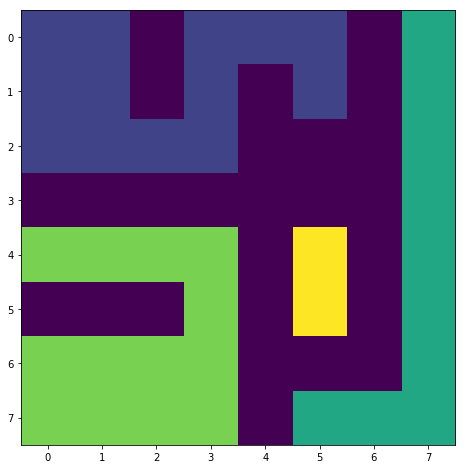

In [9]:
#Violet Colour Background
plt.figure(figsize= (n, m))
plt.imshow(data)
plt.show()

# Image

In [10]:
import cv2

In [11]:
img_file= input("Enter image file name: ")
img= cv2.imread(img_file, 0)

Enter image file name: ./Images/Polygon.png


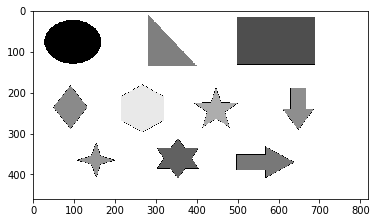

In [12]:
plt.imshow(img, cmap= 'gray')
plt.show()

In [13]:
np.unique(img)

array([  0,  78,  98, 120, 127, 138, 142, 150, 173, 233, 255], dtype=uint8)

In [14]:
V_img= np.array(list(map(int, input("Enter space separated allowed pixel values: ").split())))

Enter space separated allowed pixel values: 0 78 98 120 127 138 142 150 173 233


In [15]:
data, eq= component_labelling(V_img, img)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
for cls in eq:
    print(cls, eq[cls])

1 [1.0]
2 [2.0]
3 [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0]
39 [39.0, 40.0, 42.0, 44.0, 46.0, 47.0, 49.0, 51.0, 54.0, 56.0, 59.0, 61.0, 63.0, 66.0, 68.0, 69.0, 72.0, 74.0, 77.0, 78.0, 80.0, 83.0, 85.0, 87.0, 89.0, 91.0, 93.0, 96.0, 98.0, 99.0]
41 [128.0, 41.0, 43.0, 45.0, 48.0, 50.0, 53.0, 55.0, 60.0, 62.0, 65.0, 67.0, 71.0, 73.0, 76.0, 79.0, 82.0, 84.0, 86.0, 90.0, 92.0, 95.0, 97.0, 101.0, 102.0, 103.0, 105.0, 106.0, 108.0, 109.0, 111.0, 112.0, 114.0, 115.0, 117.0, 119.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0]
52 [130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 52.0, 57.0, 64.0, 70.0, 75.0, 81.0, 88.0, 94.0, 100.0, 104.0, 107.0, 110.0, 113.0, 116.0, 118.0, 120.0]
58 [129.0, 58.0]
141 [141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 149.0, 150.0, 152.0, 153.0, 155.0, 156.0, 158.0, 

In [17]:
print(f"Number of labels: {len(eq)}")

Number of labels: 10


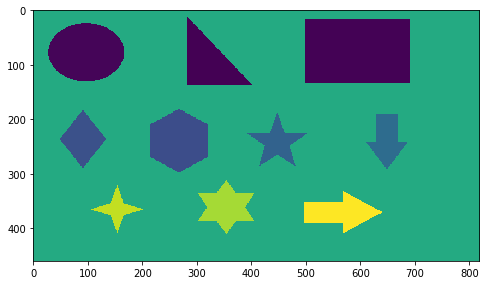

In [18]:
plt.figure(figsize= (n, m))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j]==0:
            data[i, j]= 100
plt.imshow(data)
plt.show()